# Exercise 1
By: Jorge Aranda (800839) and Alberto Zafra (876628)

***EXERCISE 1: STATIC CONSENSUS***



In [1]:
# This is a comment in python. The following import statement is just for python2 python3 compatibility reasons
from __future__ import absolute_import, division, print_function, unicode_literals
import random

## **Remember to download if you want to save your tests (File-Download .py or .ipynb)**

# Building a static graph

For arrays, we will use numpy arrays.

In [37]:
import numpy as np  # Make numpy available using np.
from matplotlib import pyplot as plt # Plotting of the graph

class mrs_graph:

  def __init__(self,n_agents=4,link_list=np.array([[0, 1], [0, 2], [1,2], [2, 3]]),sx0=[0,1,2,3],sy0=[0,3,2,4],undirected=True,alpha=0.004):
    """__init__ --> Constructor of the mrs_graph class

      Args:
          n_agents (int, optional): Determines the number of agents present within the graph. Defaults to 4.
          link_list (numpy.ndarray, optional): Determines the list of links within the graph. Defaults to np.array([[0, 1], [0, 2], [1,2], [2, 3]]).
          undirected (bool, optional): Determines if the graph is undirected or directed. Defaults to True.

      Raises:
          ValueError: If the link_list contains an agent that it is not within the graph an error would be raised
    """

    self.n=n_agents # number of agents. Indices are 0, 1, ..., n-1
    self.alpha = alpha

    # Matrices
    self.graph_A=np.zeros((self.n,self.n))  # This is the Adjacency matrix (size nxn)
    self.graph_E=np.zeros((len(link_list),self.n))  # This is the Incidence matrix (size nxlinks)
    self.graph_D=np.zeros((self.n,self.n))  # This is the Diagonal matrix (size nxn)
    self.graph_L=np.zeros((self.n,self.n))  # This is the Laplacian matrix (size nxn)
    self.graph_W=np.zeros((self.n,self.n))  # This is the Weight matrix (size nxn)


    #links
    if(np.max(link_list) <= n_agents):
      self.list_links = link_list # include more links as desired
    else:
      self.list_links = np.array([])
      incorrect_links = np.where(link_list > self.n)[0]
      raise ValueError("Revisit the links that you have created, it might be that the links {} incorrect".format(incorrect_links))

    # Determines if the graph is directed or not
    self.is_undirected=undirected
    debug = False

    # We compute the initial Adjacency matrix
    self.compute_AdjacencyMatrix(debug_print=debug)

    # We compute the initial Incidence matrix
    self.compute_IncidenceMatrix(debug_print=debug)

    # We compute the initial Diagonal matrix
    self.compute_DegreeMatrix(debug_print=debug)

    # We compute the initial Laplacian matrix
    self.compute_LaplacianMatrix(debug_print=debug)

    # We compute the initial Weight matrix
    self.compute_WeightMatrix(debug_print=debug)

    self.states_x_0= sx0 # Select the initial states
    self.states_y_0= sy0 # Select the initial states

  # ++++++++++++++++++++++++++ Undirection Methods ++++++++++++++++++++++++++

  def set_undirected(self,undirected):
    """set_undirected --> Overwrites the undirection constraint

    Args:
        undirected (bool): The new value of the direction constraint
    """
    self.is_undirected=undirected

  def get_undirected(self):
    """get_undirected --> Returns the undirection value

    Returns:
        bool: The undirection value
    """
    return self.is_undirected



  # ++++++++++++++++++++++++++ Agent Methods ++++++++++++++++++++++++++
  def set_n_agents(self,n_agents, link_list):

    """set_n_agents --> Overwrites the number of agents of the graph and updates graph accordingly

      Args:
        n_agents (int): The new number of agents (nodes) present within the graph
    """


    self.n = n_agents
    # TODO: Update the link list
    self.graph_A=np.zeros((self.n,self.n)) # We reset the adjacency matrix based on the new number of agents
    # TODO: Put a function that recomputes all the matrices
    self.update_A() # We update the adjacency matrix


  def get_n_agents(self):

    """get_n_agents --> Returns the number of agents present within the graph

    Returns:
        int: Number of agents within the graph
    """

    return self.n




  # ++++++++++++++++++++++++++ Link List Methods ++++++++++++++++++++++++++

  def set_link_list(self, link_list):
    """set_link_list --> Generated only for naming purposes. Overwrites the link list of the graph

    Args:
        link_list (numpy.ndarray): new list of links that will overwrite the current list
    """
    self.set_links(link_list)


  def set_links(self,link_list):
    """set_links --> Overwrites the link list of the graph

      Args:
          link_list (numpy.ndarray): new list of links that will overwrite the current list

      Raises:
          ValueError: If the link_list contains an agent that it is not within the graph an error would be raised
    """
    if(np.max(link_list) <= self.n):
      self.list_links = link_list # include more links as desired
      # TODO: execute all the methods of the matrices
      self.update_A() # Update the adjacency matrix
    else:
      incorrect_links = np.where(link_list > self.n)[0] ### --> Maybe an error
      raise ValueError("Could not overwrite the link list, it might be that the inputed links {} are incorrect".format(incorrect_links))

  def get_link_list(self):
    """get_link_list --> returns the list of links within the graph

    Returns:
        numpy.ndarray: list of links
    """
    return self.list_links

  def get_n_links(self):
    """get_n_links --> returns the number of links present within the graph

    Returns:
        int: number of links within the graph
    """
    return self.list_links.shape[0]

  def add_links(self, links_to_add, debug_print=False):
    """add_links --> add links to the graph, it avoids repeated links and incorrect links

    Args:
        links_to_add (numpy.ndarray): List of links that have to be added
        debug_print (bool, optional): Boolean used for printing the non-added elements. Defaults to False.
    """

    # We get the links that are not within the previously generated list of links
    link_differences = self.compare_lists(self.list_links, links_to_add)

    elements_to_add = links_to_add[link_differences == False] # We get the elements that are not within the list_links

    added_elements = np.array([])
    for element in elements_to_add:
      if np.max(element) < self.n:
        np.vstack((self.list_links, element))
        np.vstack((added_elements, element))
      else:
        continue

    print("Successfully added the elements {} within the link list".format(added_elements))

    # Print the non-added elements
    if(debug_print):
      excluded_elements = self.compare_lists(added_elements, elements_to_add)
      excluded_elements = elements_to_add[excluded_elements == False]
      print("Elements {} have been excluded".format(excluded_elements))

      repeated_elements = links_to_add[link_differences]
      print("Elements {} were avoided due to repetition".format(repeated_elements))

  def delete_links(self, links_to_remove, debug_print=False):
    """delete_links --> Generated only for naming simplicity, it removes desired links from the link list

    Args:
        links_to_remove (numpy.ndarray/list): List of links to remove
        debug_print (bool, optional): Boolean used for printing the non-added elements. Defaults to False.

    """
    self.remove_links(links_to_remove,debug_print)



  def remove_links(self, links_to_remove, debug_print=False):

    """remove_links --> It removes desired links from the link list

    Args:
        links_to_remove (numpy.ndarray/list): List of links to remove
        debug_print (bool, optional): Boolean used for printing the non-added elements. Defaults to False.

    """

    if(type(links_to_remove) == 'list'):

      # If we have a list with the indices --> like links_to_remove = [0, 2, 4]
      mask = np.ones(len(self.list_links), dtype=bool)

      links_to_remove = np.array([links_to_remove]).squeeze()


      mask[links_to_remove[np.where(links_to_remove < len(self.list_links))[0]]] = False

      if(debug_print):
        print("Successfully deleted links {} with indices {}".format(self.list_links[links_to_remove], links_to_remove))

      self.list_links = self.list_links[mask]

    else:

      # If we have a list of links --> like links_to_remove = [[0,1], [1,2]]
      mask = self.compare_lists(links_to_remove, self.list_links)

      if(debug_print):
        print("Successfully deleted links {}".format(self.list_links[mask]))

      self.list_links = self.list_links[~mask]


    print("Updated link list = {}".format(self.list_links))

    # TODO: Update all the matrices
    self.update_A()


  def compare_lists(array1, array2):
    """compare_lists --> It compares 2 arrays

    Args:
        array1 (numpy.ndarray): Array used as a reference
        array2 (numpy.ndarray): Array used for the comparison

    Returns:
        numpy.ndarray: It returns a boolean numpy.ndarray of shape(array2) with a True value in the positions of the elements of the array2 that are contained within array1, False otherwise
    """
    return np.any(np.all(array2[:, None, :] == array1, axis=2), axis=1)


  def get_random_link(self):
    """get_random_link --> It gets a random link from the list link

    Returns:
        numpy.ndarray: The links randomly gotten
    """

    return random.choice(self.list_links)


# ++++++++++++++++++++++++++ Adjacency Matrix Methods ++++++++++++++++++++++++++
  def update_A(self, debug_print=False):
    """update_A --> Generated only for naming simplicity, it updates the adjacency matrix by recomputing it
    """
    self.compute_AdjacencyMatrix(debug_print)


  def compute_AdjacencyMatrix(self, debug_print=False):
    """compute_AdjacencyMatrix --> computes the Adjacency Matrix based on the list of links
                               --> More info: https://byjus.com/maths/adjacency-matrix/

          Args:
              debug_print (bool, optional): Boolean used for printing the computations. Defaults to False.
    """

    for indx in range(self.list_links.shape[0]):
      node_i = self.list_links[indx,0]
      node_j = self.list_links[indx,1]
      if(debug_print):
        print("indx:", indx)
        print("link element: (", node_i, ",", node_j, ")")
      self.graph_A[node_i, node_j]=1
      if self.is_undirected:
          self.graph_A[node_j, node_i]=1

  def get_A(self):
    """get_A --> Generated only for naming simplicity, it returns the adjacency matrix

    Returns:
        numpy.ndarray : Adjacency matrix
    """
    return self.graph_A

  def get_Adjacency_Matrix(self):
    """get_Adjacency_Matrix --> It returns the adjacency matrix

    Returns:
        numpy.ndarray : Adjacency matrix
    """
    return self.graph_A



  # ++++++++++++++++++++++++++ Incidence Matrix Methods ++++++++++++++++++++++++++

  def update_E(self,debug_print=False):
    """update_E --> Generated only for naming simplicity, it updates the incidency matrix by recomputing it

      Args:
        debug_print (bool, optional): Boolean used for printing the computations. Defaults to False.
    """
    self.compute_IncidenceMatrix(debug_print)

  def compute_IncidenceMatrix(self,debug_print=False):
    """compute_IncidenceMatrix --> computes the Incidency Matrix based on the list of links
                              --> More info: https://amitrajan012.github.io/post/chapter_10_graphs_networks_and_incidence_matrices/

    Args:
        debug_print (bool, optional): Boolean used for printing the computations. Defaults to False.
    """
    for indx in range(self.list_links.shape[0]):
      node_i = self.list_links[indx,0]  #
      node_j = self.list_links[indx,1]
      if(debug_print):
        print("indx:", indx)
        print("link element: (", node_i, ",", node_j, ")")
      self.graph_E[indx, node_j]=1
      if self.is_undirected:
          self.graph_E[indx, node_i]=1
      else:
        self.graph_E[indx, node_i]=-1


  def get_E(self):
    """get_E --> Generated for naming simplicity, it returns the Incidence Matrix

    Returns:
        numpy.ndarray : Returns the Incidence Matrix
    """
    return self.graph_E

  def get_IncidenceMatrix(self):
    """get_IncidenceMatrix --> Returns the Incidence Matrix

    Returns:
        numpy.ndarray : Returns the Incidence Matrix
    """

    return self.graph_E




  # ++++++++++++++++++++++++++ Degree Matrix Methods ++++++++++++++++++++++++++

  def update_D(self,debug_print=False):
    """update_D --> Generated only for naming simplicity, it updates the degree matrix by recomputing it

      Args:
        debug_print (bool, optional): Boolean used for printing the computations. Defaults to False.
    """
    self.compute_DegreeMatrix(debug_print)

  def compute_DegreeMatrix(self,debug_print=False):
    """compute_DiagonalMatrix --> Computes the degree matrix
                              --> More info: https://en.wikipedia.org/wiki/Degree_matrix

    Args:
        debug_print (bool, optional): Boolean used for printing the computations. Defaults to False.
    """
    self.update_A(debug_print)
    # We compute the degree matrix as the diagonal of A*Transpose(A)
    self.graph_D = np.diag(np.diag(self.graph_A @ self.graph_A.T))

    if(debug_print):
      print(self.graph_D)


  def get_D(self):
    """get_D --> Generated for naming simplicity, it returns the Degree Matrix

    Returns:
        numpy.ndarray : Returns the Degree Matrix
    """
    return self.graph_D

  def get_DegreeMatrix(self):
    """get_DegreeMatrix --> Returns the Degree Matrix

    Returns:
        numpy.ndarray : Returns the Degree Matrix
    """

    return self.graph_D



  # ++++++++++++++++++++++++++ Laplacian Matrix Methods ++++++++++++++++++++++++++

  def update_L(self,debug_print=False):
    """update_L --> Generated only for naming simplicity, it updates the Laplacian matrix by recomputing it

      Args:
        debug_print (bool, optional): Boolean used for printing the computations. Defaults to False.
    """
    self.compute_LaplacianMatrix(debug_print)

  def compute_LaplacianMatrix(self,debug_print=False):
    """compute_LaplacianMatrix --> Computes the Laplacian matrix
                              --> More info: https://en.wikipedia.org/wiki/Laplacian_matrix

    Args:
        debug_print (bool, optional): Boolean used for printing the computations. Defaults to False.
    """
    self.update_D(debug_print)  # We update the Degree Matrix in order to have the most recent computation
    # We compute the Laplacian matrix as Degree matrix - Adjacent matrix
    self.graph_L = self.graph_D - self.graph_A

    if(debug_print):
      print(self.graph_L)


  def get_L(self):
    """get_L --> Generated for naming simplicity, it returns the Laplacian Matrix

    Returns:
        numpy.ndarray : Returns the Laplacian Matrix
    """
    return self.graph_L

  def get_LaplacianMatrix(self):
    """get_LaplacianMatrix --> Returns the Laplacian Matrix

    Returns:
        numpy.ndarray : Returns the Laplacian Matrix
    """

    return self.graph_L



  def get_algebraic_conn(self,debug_print=False):
    """get_algebraic_conn --> Computes the algebraic connectivity of the graph based on the Laplacian matrix
                          --> The algebraic connectivity is the second eigen value
                          --> If this eigen value is greater than 0 the graph is connected, otherwise, it is disconnected
                          --> The bigger the eigen values is the more connected the graph is

    Args:
        debug_print (bool, optional): Boolean used for printing the computations. Defaults to False.

    Returns:
        numpy.complex128: Returns the second eigenvalue of the Laplacian matrix (also known as the algebraic connectivity)
    """
    eigenvalues = np.sort(self.get_eigenvalues(self.graph_L))
    algebraic_conn = eigenvalues[1]# display the algebraic connectivity
    if(debug_print):
      print("Eigen Values of the Laplacian Matrix: ", eigenvalues)
      print("algebraic connectivity: ", algebraic_conn)

    return algebraic_conn

# ++++++++++++++++++++++++++ Weight Matrix Methods ++++++++++++++++++++++++++

  def update_W(self,debug_print=False):
    """update_W --> Generated for naming simplicity, it computes the Weight Matrix

    Args:
        debug_print (bool, optional): Boolean used for printing the computations. Defaults to False.
    """
    self.compute_WeightMatrix(debug_print)



  def compute_WeightMatrix(self,debug_print=False):
    """compute_WeightMatrix --> Computes the Weight matrix based on the Perron matrix
                            --> More info: https://math.stackexchange.com/questions/28282/perron-frobenius-theorem-and-graph-laplacians

    Args:
        debug_print (bool, optional): Boolean used for printing the computations. Defaults to False.
    """

    self.update_L(debug_print)

    self.graph_W = np.eye(np.shape(self.get_LaplacianMatrix())[0]) - self.alpha * self.get_LaplacianMatrix()# compute the Perron matrix associated to the Laplacian

    if debug_print:
      print("Weight_matrix =", self.graph_W)


  def get_W(self):
    """get_W --> Generated for naming simplicity, it returns the Weight Matrix

    Returns:
        numpy.ndarray : Returns the Weight Matrix
    """
    return self.graph_W

  def get_WeightMatrix(self):
    """get_WeightMatrix --> Returns the Weight Matrix

    Returns:
        numpy.ndarray : Returns the Weight Matrix
    """
    return self.graph_W

# ++++++++++++++++++++++++++ Update All Matrix Method ++++++++++++++++++++++++++


  def update_AllMatrices(self,debug_print=False):
    """update_AllMatrices --> Computes all the matrices of the graph systematically (Adjacent, Incidence, Degree, Laplacian and Weight matrices)

    Args:
        debug_print (bool, optional): Boolean used for printing the computations. Defaults to False.
    """
    self.compute_AllMatrices(debug_print)


  def compute_AllMatrices(self,debug_print=False):

    # First we compute the Incidence matrix
    self.update_E(debug_print)

    # Secondly, we compute the Weight, Laplacian, Degree and Adjacency matrices
    self.update_W(debug_print)




# ++++++++++++++++++++++++++ Standard Static Matrix Methods ++++++++++++++++++++++++++

  def get_eigen(matrix, debug_print=False):
    """get_eigen --> Computes the eigenvalues and eigenvectors of the current matrix

    Args:
        matrix (numpy.ndarray): Matrix from which the eigenvalues and eigen vectors would be computed
        debug_print (bool, optional): Boolean used for printing the computations. Defaults to False.

    Returns:
        eigenvalues (numpy.ndarray): Eigen Values of the matrix
        eigenvectors (numpy.ndarray): Eigen Vectors of the matrix
    """
    eigenvalues, eigenvectors = np.linalg.eig(matrix)

    if(debug_print):
      print("Eigen Values = ", eigenvalues)
      print("Eigen Vectors = ", eigenvectors)

    return eigenvalues, eigenvectors


  def get_eigenvalues(matrix):
    """get_eigenvalues --> Computes the eigenvalues of the current matrix

    Args:
        matrix (numpy.ndarray): Matrix from which the eigenvalues and eigen vectors would be computed

    Returns:
        numpy.ndarray: Eigen Values of the matrix
    """
    eigenvalues, eigenvectors = np.linalg.eig(matrix)
    return eigenvalues


  def get_eigenvectors(matrix):
    """get_eigenvectors --> Computes the eigenvectors of the current matrix

    Args:
        matrix (numpy.ndarray): Matrix from which the eigenvalues and eigen vectors would be computed

    Returns:
        numpy.ndarray: Eigen Vectors of the matrix
    """

    eigenvalues, eigenvectors = np.linalg.eig(matrix)
    return eigenvectors



# ++++++++++++++++++++++++++ Plotting methods ++++++++++++++++++++++++++

  def plot_graph(self):
    """plot_graph --> plots the graph topology, using the Adjacency matrix
                --> All the agents (nodes) are placed within a circle
                --> The previously generated links are represented as lines between the nodes

    """

    n=self.graph_A.shape[0]
    #v_angles1=np.linspace(0, 2*np.pi, n+1, endpoint=True)
    v_angles=np.linspace(0, 2*np.pi, n, endpoint=False)
    #print(v_angles1)
    print(v_angles)
    v_x=np.cos(v_angles)
    v_y=np.sin(v_angles)
    v_x_text=np.cos(v_angles)*1.1
    v_y_text=np.sin(v_angles)*1.1
    print(v_x)
    print(v_y)
    plt.title("Graph: links")
    plt.xlabel("x axis")
    plt.ylabel("y axis")

    for i in range(n):
      for j in range(n):
        if self.graph_A[i,j]>0:
          x_ini=v_x[i]
          y_ini=v_y[i]
          dx= v_x[j] -x_ini
          dy= v_y[j] -y_ini
          plt.arrow(x_ini, y_ini, dx, dy, head_length=0.1,length_includes_head=True, head_width=0.05)
    plt.plot(v_x,v_y, "or") ,#without lines, only the dots
    for i in range(n):
      plt.text(v_x_text[i], v_y_text[i], str(i))
    plt.show()

  def plot_evolutionxy(self):
    plt.title("Evolution of the x,y coordinates of each node")
    plt.xlabel("x axis")
    plt.ylabel("y axis")

    (n, num_iter)=self.states_x_iter.shape
    for i in range(n):
      v_x=self.states_x_iter[i,:]
      v_y=self.states_y_iter[i,:]
      plt.plot(v_x,v_y, marker='.',)
      # Special markers for the first and last values
      plt.plot(v_x[0],v_y[0],marker='x')
      plt.plot(v_x[-1],v_y[-1],marker='o')
      # alternative if we want to use arrows instead of lines.
      #x_ini=v_x[k]
      #y_ini=v_y[k]
      #dx= v_x[k+1] -x_ini
      #dy= v_y[k+1] -y_ini
      #plt.arrow(x_ini, y_ini, dx, dy, head_length=0.1,length_includes_head=True, head_width=0.05)
    plt.show()

  def plot_evolutionx(self):
    (n, num_iter)=self.states_x_iter.shape
    plt.figure
    plt.title("Evolution of the x-coordinates along the iterations")
    plt.xlabel("Iterations")
    plt.ylabel("x-coordinate")
    v_x=np.arange(0,num_iter)
    for i in range(n):
      v_y=self.states_x_iter[i,:]
      plt.plot(v_x,v_y, marker='.',)
      # Special markers for the first and last values
      plt.plot(v_x[0],v_y[0],marker='x')
      plt.plot(v_x[-1],v_y[-1],marker='o')
    plt.show()

  def plot_evolutiony(self):
    (n, num_iter)=self.states_y_iter.shape
    plt.figure
    plt.title("Evolution of the y-coordinates along the iterations")
    plt.xlabel("Iterations")
    plt.ylabel("y-coordinate")
    v_x=np.arange(0,num_iter)
    for i in range(n):
      v_y=self.states_y_iter[i,:]
      plt.plot(v_x,v_y, marker='.',)
      # Special markers for the first and last values
      plt.plot(v_x[0],v_y[0],marker='x')
      plt.plot(v_x[-1],v_y[-1],marker='o')
    plt.show()
# ++++++++++++++++++++++++++ Step methods ++++++++++++++++++++++++++

  def stepn(self,N_ITER=2000):
    """stepn --> makes N steps

    """
    self.states_x_iter = np.zeros((self.n, N_ITER+1))
    self.states_y_iter = np.zeros((self.n, N_ITER+1))

    # Initialization
    self.states_x_iter[:,0]=self.states_x_0
    self.states_y_iter[:,0]=self.states_y_0
    #print("states_x_iter")
    #print(states_x_iter)

    # CONSENSUS ITERATIONS
    for k in range(N_ITER):
      cur_x = self.states_x_iter[:,k]
      cur_y = self.states_y_iter[:,k]
      next_x = self.graph_W @ cur_x; # compute the next states
      next_y = self.graph_W @ cur_y; # compute the next states
      # store values
      self.states_x_iter[:,k+1]=next_x
      self.states_y_iter[:,k+1]=next_y
    print("last x value", next_x)
    print("last y value", next_y)

  def stepn_leader(self,N_ITER=2000,leader=[0]):
    """stepn --> makes N steps

    """
    self.states_x_iter = np.zeros((self.n, N_ITER+1))
    self.states_y_iter = np.zeros((self.n, N_ITER+1))

    # Initialization
    self.states_x_iter[:,0]=self.states_x_0
    self.states_y_iter[:,0]=self.states_y_0
    #print("states_x_iter")
    #print(states_x_iter)

    # CONSENSUS ITERATIONS
    for k in range(N_ITER):
      cur_x = self.states_x_iter[:,k]
      cur_y = self.states_y_iter[:,k]
      next_x = self.graph_W @ cur_x; # compute the next states
      next_y = self.graph_W @ cur_y; # compute the next states
      # store values
      self.states_x_iter[:,k+1]=next_x
      self.states_y_iter[:,k+1]=next_y
      self.states_x_iter[leader,k+1]=self.states_x_0[leader]
      self.states_y_iter[leader,k+1]=self.states_y_0[leader]
      
    print("last x value", next_x)
    print("last y value", next_y)

  def stepn_gossip(self,N_ITER=2000):
    """stepn_gossip --> makes N steps

    """
    self.states_x_iter = np.zeros((self.n, N_ITER+1))
    self.states_y_iter = np.zeros((self.n, N_ITER+1))

    # Initialization
    self.states_x_iter[:,0]=self.states_x_0
    self.states_y_iter[:,0]=self.states_y_0
    #print("states_x_iter")
    #print(states_x_iter)

    step_size = 0.01

    # CONSENSUS ITERATIONS
    for k in range(N_ITER):
      next_x = self.states_x_iter[:,k]
      next_y = self.states_y_iter[:,k]

      [r1,r2] = self.get_random_link()

      next_x[r1] = next_x[r1]+step_size*(next_x[r2]-next_x[r1]); # compute the next states
      next_x[r2] = next_x[r2]+step_size*(next_x[r1]-next_x[r2]); # compute the next states
      next_y[r1] = next_y[r1]+step_size*(next_y[r2]-next_y[r1]); # compute the next states
      next_y[r2] = next_y[r2]+step_size*(next_y[r1]-next_y[r2]); # compute the next states
      # store values
      self.states_x_iter[:,k+1]=next_x
      self.states_y_iter[:,k+1]=next_y
    print("last x value", next_x)
    print("last y value", next_y)




# ------------------------------------------------------------------ End of the class ------------------------------------------------------------------------------

Once we have defined the basic values for the graph, we introduce the links in the graph_A matrix (**Adjacency** matrix). Feel free to re-organize the code and implement these functionalities in class methods, to improve the code use in your future implementations. If you have finally a class to manage the graphs, you will be able to use it later in a better way

shape 0 (number of links): 4
Shape 0:  4
shape 1 (the two nodes involved): 2
[[0. 1. 1. 0.]
 [1. 0. 1. 0.]
 [1. 1. 0. 1.]
 [0. 0. 1. 0.]]
[0.         1.57079633 3.14159265 4.71238898]
[ 1.0000000e+00  6.1232340e-17 -1.0000000e+00 -1.8369702e-16]
[ 0.0000000e+00  1.0000000e+00  1.2246468e-16 -1.0000000e+00]


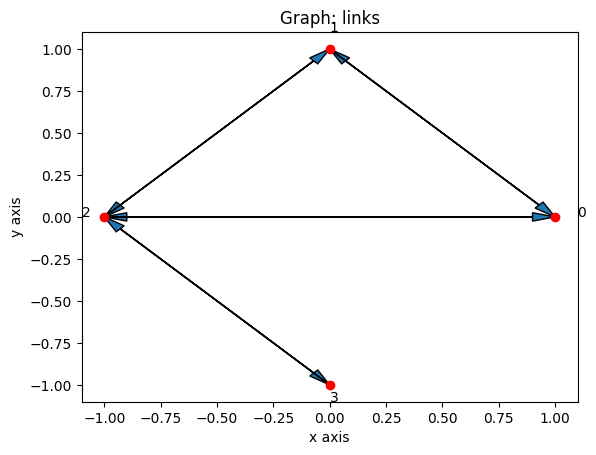

In [19]:
my_graph1=mrs_graph()
print("shape 0 (number of links):", my_graph1.list_links.shape[0])
print("Shape 0: ", my_graph2.get_n_links())
print("shape 1 (the two nodes involved):", my_graph1.list_links.shape[1])

print(my_graph1.graph_A)

my_graph1.plot_graph()

# Laplacian based static consensus

Build the **Laplacian** matrix. Obtain the **algebraic connectivity**. Build the **weight** matrix (Laplacian based **Perron** matrix). Choose an **alpha** small enough for the Laplacian matrix, so that the weight matrix is convergent.

last x value [1.4997249  1.4997249  1.5        1.50055021]
last y value [2.2497249  2.2497249  2.25       2.25055021]


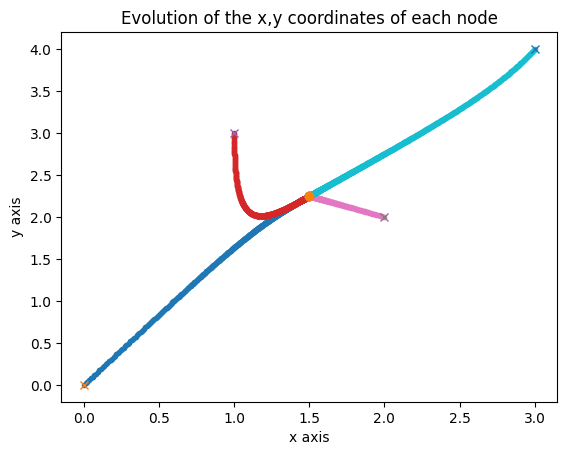

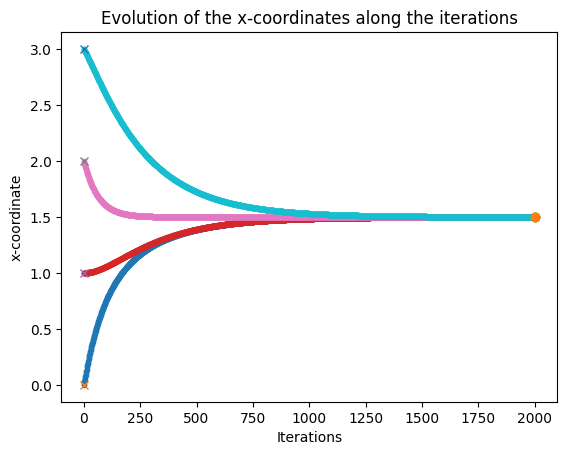

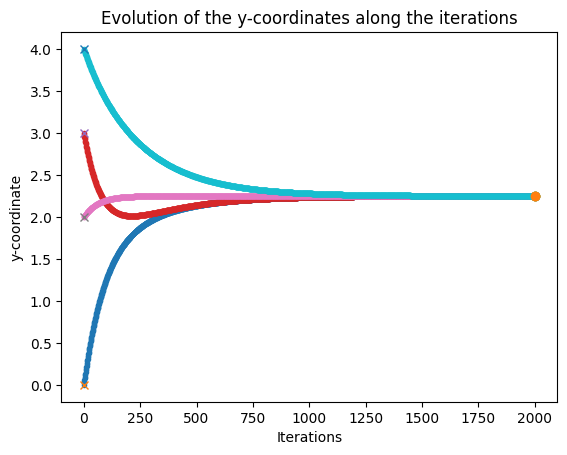

In [20]:
# DEFAULT: 
# class mrs_graph(
#     n_agents: int = 4,
#     link_list: NDArray[Any] = np.array([[0, 1], [0, 2], [1, 2], [2, 3]]),
#     sx0: Any = [0, 1, 2, 3],
#     sy0: Any = [0, 3, 2, 4],
#     undirected: bool = True,
#     alpha: float = 0.004
# )

my_graph1=mrs_graph()

my_graph1.stepn(2000)

my_graph1.plot_evolutionxy()
my_graph1.plot_evolutionx()
my_graph1.plot_evolutiony()

# Questions:

## What are the effects of changing the parameter **alpha** in the Perron matrix? Do you observe any relation with any other parameter in the involved matrices?

By changing alpha, we are changing how big the steps are. The bigger, the faster the robots will reach the goal. While if it is smaller, they may not reach the goal in the same amount of steps.

last x value [1.5 1.5 1.5 1.5]
last y value [2.25 2.25 2.25 2.25]


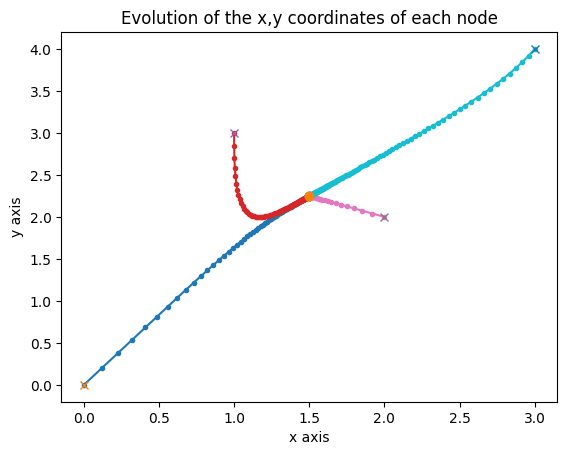

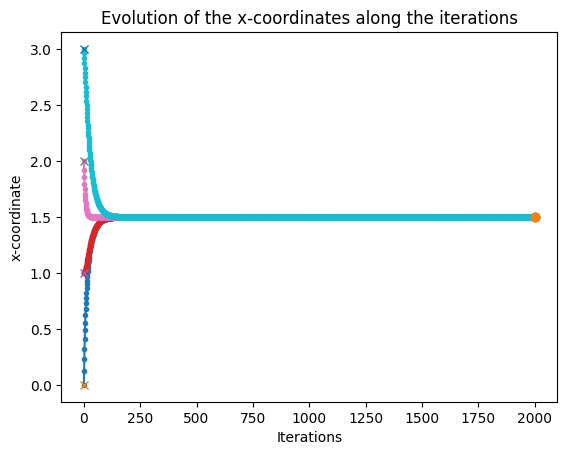

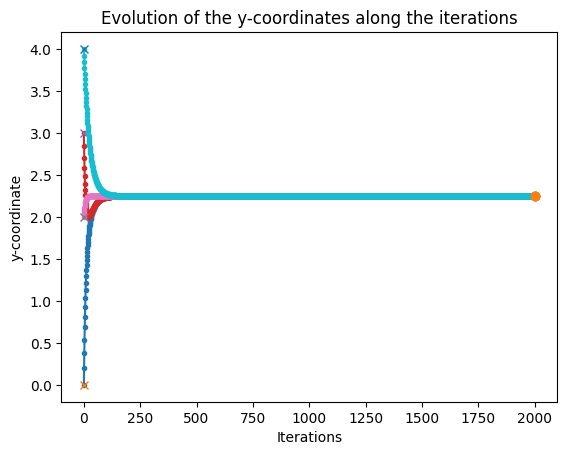

In [21]:
# BIG ALPHA
my_graph2=mrs_graph(alpha=0.04)

my_graph2.stepn(2000)

my_graph2.plot_evolutionxy()
my_graph2.plot_evolutionx()
my_graph2.plot_evolutiony()

last x value [1.07354915 1.16413646 1.52032894 2.24198545]
last y value [1.74312631 2.01488824 2.23983553 3.00214992]


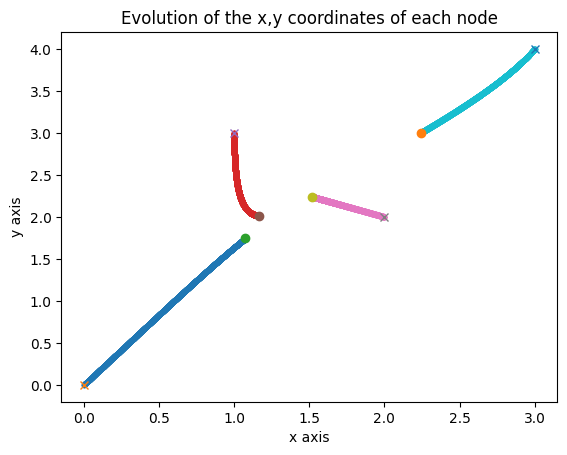

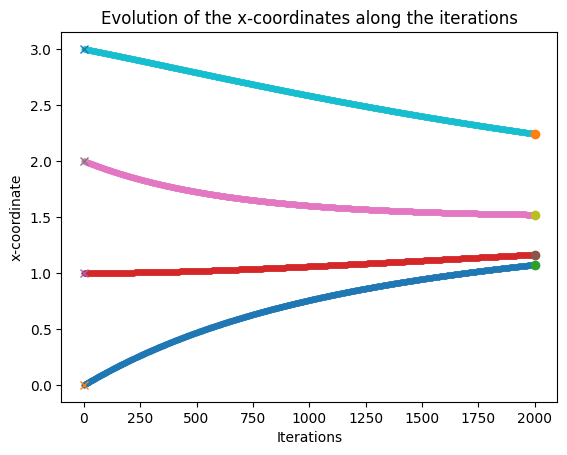

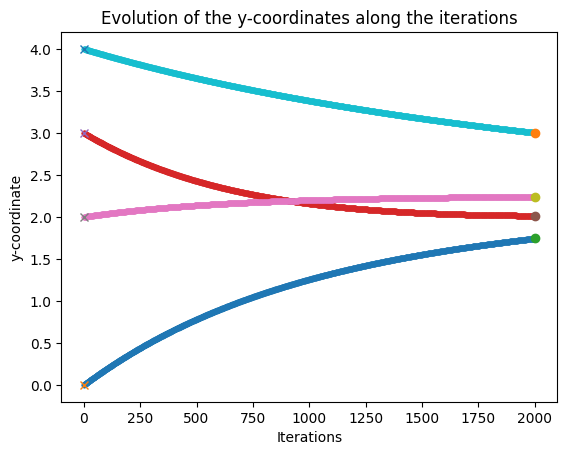

In [22]:
# SMALL ALPHA
my_graph3=mrs_graph(alpha=0.0004)

my_graph3.stepn(2000)

my_graph3.plot_evolutionxy()
my_graph3.plot_evolutionx()
my_graph3.plot_evolutiony()

## What are the effects of including several **additional links**? Do you observe any relation with the other parameters?

If we make the graph fully conected, the robots reach the goal sooner. This is because, by adding links, the total contribution grows and the movements are more precise.

last x value [1.5 1.5 1.5 1.5]
last y value [2.25 2.25 2.25 2.25]


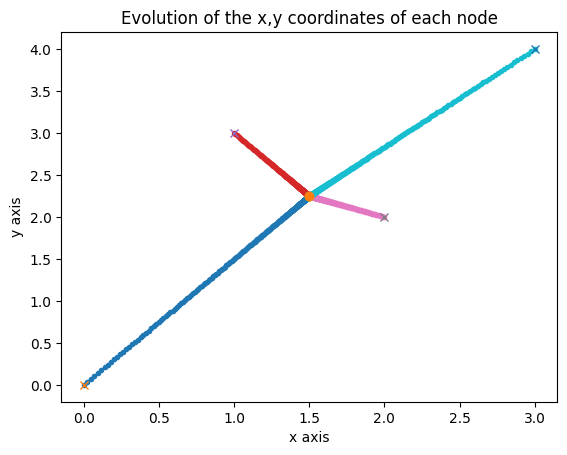

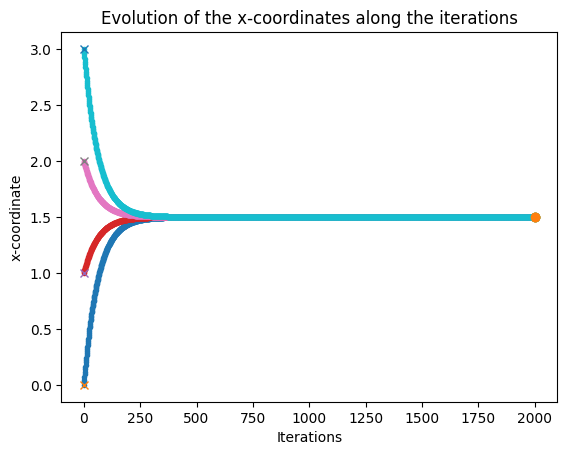

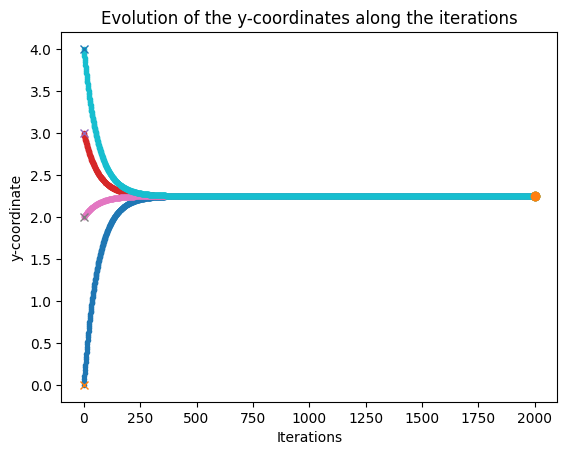

In [25]:
# Code for testing

my_graph4=mrs_graph(link_list=np.array([[0, 1], [0, 2], [0,3], [1, 2], [1,3], [2, 3]]))

my_graph4.stepn(2000)

my_graph4.plot_evolutionxy()
my_graph4.plot_evolutionx()
my_graph4.plot_evolutiony()

## What happens if the graph is **disconnected**? (robots are divided into two separated connected subgraphs) Does it make sense?

As we make two separate groups, robots belonging to each group tend to group together. This makes sense because by removing the links that join them we are making them unable to know that the other group exists.

last x value [1.         0.99983494 1.00016506 2.66666667 2.6665016  2.66683173]
last y value [1.66666667 1.66683173 1.6665016  3.         3.00016506 2.99983494]


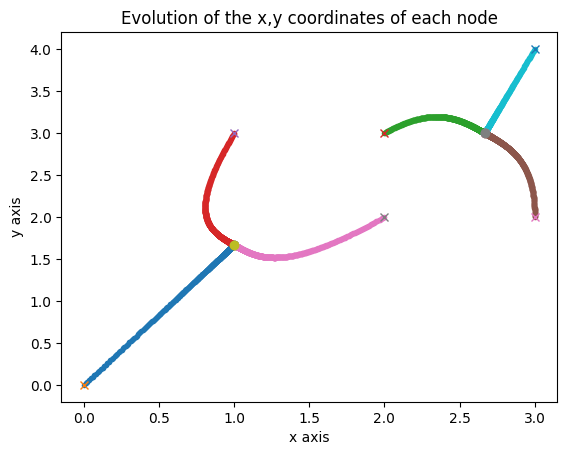

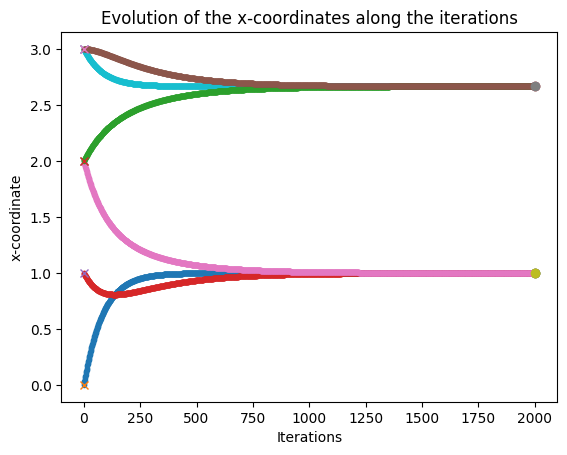

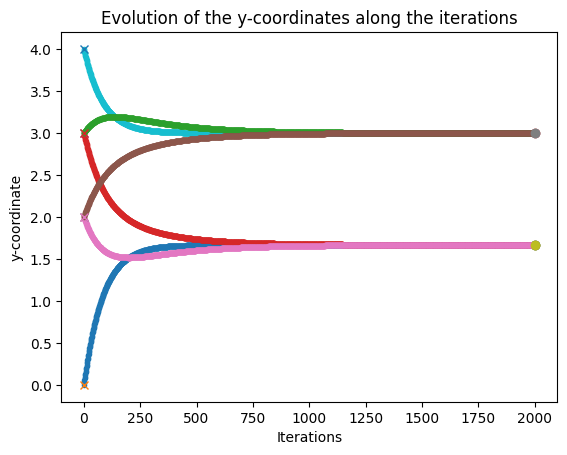

In [30]:
# Code for testing

my_graph5=mrs_graph(6,np.array([[0,1],[0,2],[3,4],[3,5]]),np.array([0,1,2,3,2,3]),np.array([0,3,2,4,3,2]))

my_graph5.stepn(2000)

my_graph5.plot_evolutionxy()
my_graph5.plot_evolutionx()
my_graph5.plot_evolutiony()

## What happens if one robot is **leader**? (i.e., it does not take into account the information from the neighbors, but it keeps its state unchanged instead)

If there's a leader, the rest of the robots will still keep coming together. However, the final position will be the leader's.

last x value [1.00022008 1.00000265 1.00022008 1.00022008]
last y value [2.99966988 2.99999602 2.99966988 2.99966988]


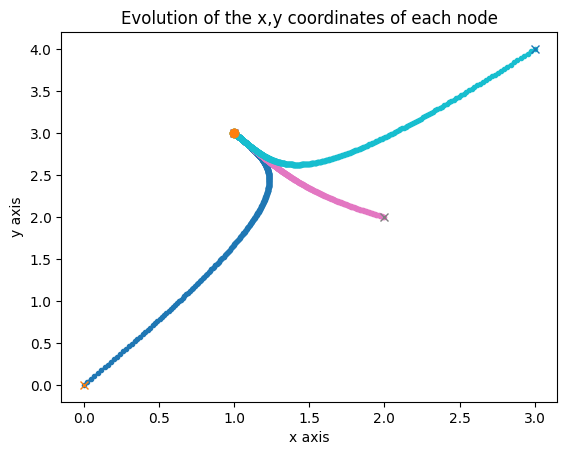

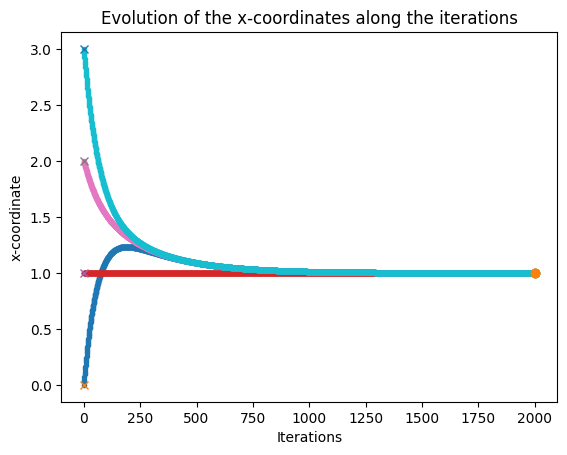

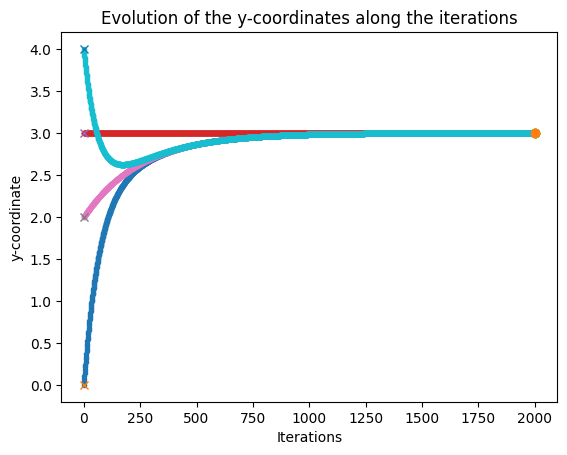

In [38]:
# Code for testing

my_graph6=mrs_graph(link_list=np.array([[0, 1], [0, 2], [0,3], [1, 2], [1,3], [2, 3]]))

my_graph6.stepn_leader(2000,1)

my_graph6.plot_evolutionxy()
my_graph6.plot_evolutionx()
my_graph6.plot_evolutiony()

## And if three of the robots are leaders instead? What is the **name** of this problem?

The leaders stay in place as before, but the non-leaders move up to the middle position between the known robots. this problem is a leader election problem where you have to choose who to follow.

last x value [1.55999707 1.01887998 2.1199989  2.99648    2.0399992  2.98463999]
last y value [2.95999419 2.99407996 2.91999781 3.99567999 2.63999841 2.01023998]


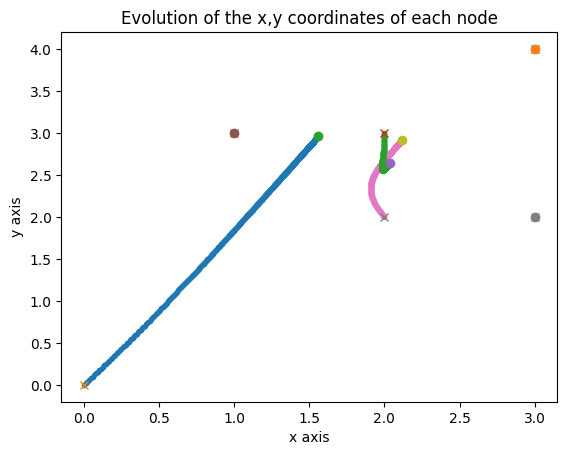

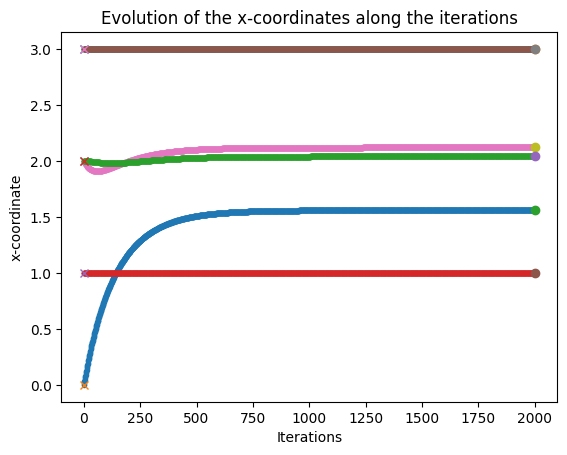

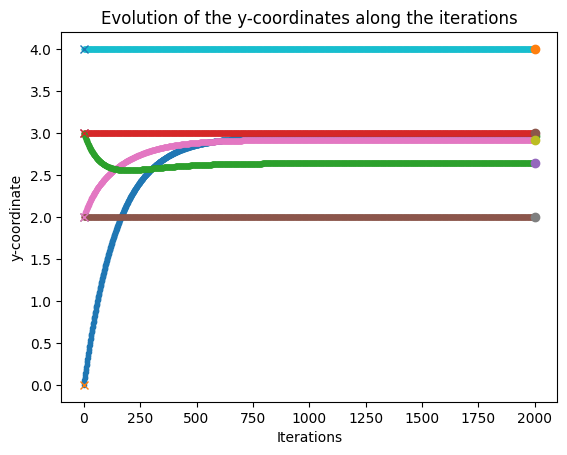

In [41]:
# Code for testing

my_graph7=mrs_graph(6,np.array([[0,1],[0,2],[1,2],[1,4],[1,5],[2,3],[2,4],[2,5],[4,5]]),np.array([0,1,2,3,2,3]),np.array([0,3,2,4,3,2]))

my_graph7.stepn_leader(2000,[1,3,5])

my_graph7.plot_evolutionxy()
my_graph7.plot_evolutionx()
my_graph7.plot_evolutiony()

## In a gossip scheme, at every iteration, one link is randomly selected. Then, the two involved robots i, j, instead of using the consensus rule, update their states with **(xi + xk)/2**. Does this algorithm converge? Is the graph "connected" in this case?

(NOTE: we have implemented a version where **(xi + xk)/2** is modified so robots move more smoothly. This is done by multiplying the desired direction with a factor alpha that controls the moving speed)
Yes, the algorithm converge.
If we wanted to abstract this way of computing the next move into a Laplacian problem, the graph would **not** be connected **in each iteration**. This is because we are updating only two nodes each time (abstractly, disconnecting them from the rest, therefore making a disconnected graph). However, in the long term, they're actually connected (if the base graph is connected), since they end up talking to all their neighbors sooner or later.
Since the movements are done between random pairs, the trajectories are more shaky.

last x value [1.50395252 1.5036094  1.50968738 1.52152287]
last y value [2.25493806 2.25459125 2.26074078 2.27271602]


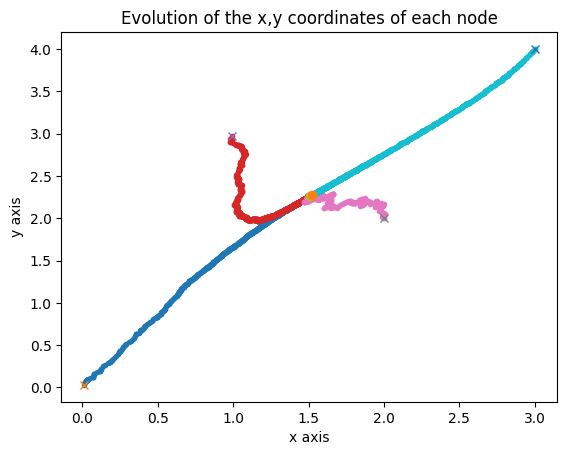

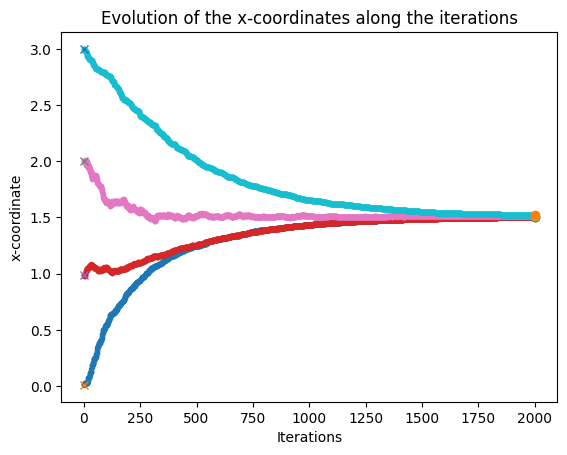

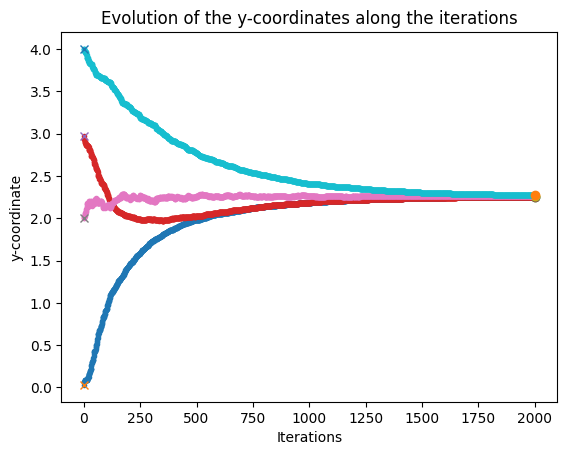

In [42]:
# Code for testing

my_graph8=mrs_graph()

my_graph8.stepn_gossip(2000)

my_graph8.plot_evolutionxy()
my_graph8.plot_evolutionx()
my_graph8.plot_evolutiony()